# Interferometro Fabris-Perot

verifica linearità: $\Delta D = \frac{\lambda}{2\cos\theta}\cdot\Delta N$

- $\sigma_{\Delta D} = 1\mu m$ incertezza del nonio

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
from jax import grad
from jax import numpy as jnp

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val
from interpolazione import Interpolazione as LinearInterpolation

sys.path.append(dir_path)

In [2]:
# SENSIBILITà MICROMETROù

ΔN = np.array([8, 14, 32, 50, 64, 77])
ΔD = np.array([3, 5, 10, 15, 20, 25]) * 10**-6 # m

sigmaD = 10**-6 # m

$\Delta D = \frac{\lambda}{2\cos\theta}\cdot\Delta N$

   
Parameters: {'A': 3.1638786295748045e-07} 
Sigma parameters: {'A': 5.956919636171236e-09}

sigmaY: 1e-06

chiquadro ridotto: 0.34
df: 5
pvalue: 99.7%
covariance matrix: [[2.46422858e-17]]    



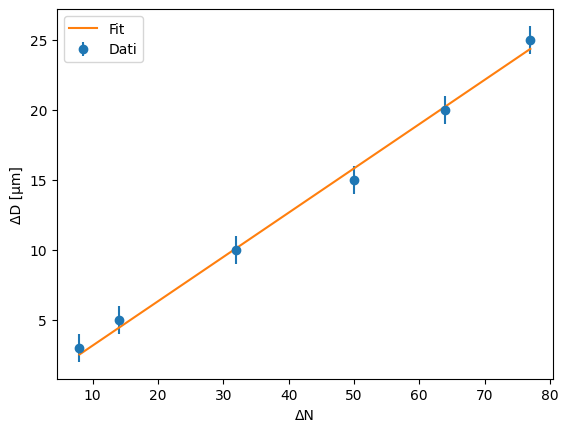

In [3]:
plt.errorbar(ΔN, ΔD, yerr=sigmaD, fmt='o', label='Dati')

fit = LinearInterpolation(ΔN, ΔD,lambda x,A: x*A, sigmaD,p0=[1],names='A')
print(fit)

plt.plot(fit.x_best, fit.y_best, label='Fit')
plt.xlabel('ΔN')
plt.ylabel('ΔD [μm]')
plt.yticks(
    np.arange(5, 30, 5)*10**-6,
    np.arange(5,30,5))
plt.legend()
plt.show()

In [4]:
# trovare la sensibilità del micrometro ossia il DeltaD associato a 1 incremento di N

# A è la sensibilità dello strumento

print('Sensibilità: ', final_val(fit.bval['A'],fit.sigma_bval['A'],decimals=3,exp=-6,udm='m'))

Sensibilità:  (0.316 ± 0.006)e-6 m
